In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load the datasets
submission_df = pd.read_csv("submission_example.csv")
batting_season_summary = pd.read_csv("batting_season_summary.csv")

# Extract unique player IDs from both datasets
submission_players = set(submission_df['Name'])
batting_season_summary_players = set(batting_season_summary['Name'])

# Find players in batting_season_summary but not in submission_example
players_in_batting_not_submission = batting_season_summary_players - submission_players

# Find players in submission_example but not in batting_season_summary
players_in_submission_not_batting = submission_players - batting_season_summary_players

# Print the results
print("Players in batting_season_summary but not in submission_example:")
print(players_in_batting_not_submission)
print()
print("\nPlayers in submission_example but not in batting_season_summary:")
print(players_in_submission_not_batting)


Players in batting_season_summary but not in submission_example:
{'Josh Wall', 'Tino Martinez', 'Erisbel Arruebarrena', 'Elih Villanueva', 'William Bergolla', 'Tyler Ladendorf', 'Casey Kelly', 'Thomas Diamond', 'Hiram Burgos', 'Tsuyoshi Wada', 'Yhonathan Barrios', 'Alvin Colina', 'Jon Ratliff', 'Trey Lunsford', 'Mike Johnston', 'Ryan Tucker', 'Xavier Scruggs', 'Shane Youman', 'Cody Clark', 'Brad Salmon', 'Vince Belnome', 'Dave Davidson', 'Tony McKnight', 'Kevin Ritz', 'Richie Barker', 'Brent Cookson', 'Joe Bisenius', "Ryan O'Malley", 'Ryan Nye', 'Billy Petrick', 'Eduardo Villacis', 'Chad Smith', 'Luis Saturria', 'Kris Johnson', 'Bart Evans', 'Alex Pelaez', 'Atahualpa Severino', 'Michael Lorenzen', 'Scott Brosius', 'Wilking Rodriguez', 'Michael Mariot', 'Scott Alexander', 'Scott Klingenbeck', 'Scott Seabol', 'Brian McNichol', 'Rod Henderson', 'Steve Cooke', 'Chris Oxspring', 'Sam Tuivailala', 'Steve Bieser', 'Chris Tremie', 'Clemente Alvarez', 'Rickey Cradle', 'Jeff Ball', 'Joe Hudson',

In [2]:
#Create new dataset from game_batting_logs and batting_season_summary
# Extract unique player IDs from both datasets

# Find players present in both datasets
common_players = submission_players.intersection(batting_season_summary_players)

# Filter game_batting_logs to include only common players
common_players_season_summary_df = batting_season_summary[batting_season_summary['Name'].isin(common_players)]

In [4]:
len(common_players_season_summary_df)

930

In [87]:
#create new col - area 
common_players_season_summary_df.loc[common_players_season_summary_df['pos'].isin(['LF', 'CF', 'RF']), 'area'] = 'outfield'
common_players_season_summary_df.loc[common_players_season_summary_df['pos'].isin(['SS', '1B', '2B', '3B']), 'area'] = 'infield'
common_players_season_summary_df.loc[common_players_season_summary_df['pos'] == 'P', 'area'] = 'P'
common_players_season_summary_df.loc[common_players_season_summary_df['pos'] == 'C', 'area'] = 'C'
common_players_season_summary_df

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year,area
3,Adam Peterson,21,Braves,1B,742,668,192,45,40,10,74,161,3.357143,0.287425,0.358491,0.519461,0.877952,2014,infield
5,Adrian Houser,33,Royals,SS,668,622,143,32,21,12,46,147,3.188623,0.229904,0.282934,0.406752,0.689687,2014,infield
18,Angel Castro,28,Mets,LF,674,622,136,26,15,4,52,136,3.261128,0.218650,0.278932,0.327974,0.606906,2014,outfield
20,Angel Salome,34,Angels,2B,695,668,148,33,20,10,27,135,3.060432,0.221557,0.251799,0.375749,0.627547,2014,infield
22,Arturo Lopez,27,Rays,SS,664,602,167,38,23,18,62,139,3.334337,0.277409,0.344880,0.506645,0.851524,2014,infield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,Keith McDonald,27,Cardinals,SS,696,612,200,42,25,20,84,77,3.170977,0.326797,0.408046,0.575163,0.983209,2023,infield
2580,Ken Vining,27,Mariners,2B,738,670,151,30,27,4,68,184,3.609756,0.225373,0.296748,0.368657,0.665405,2023,infield
2581,Kensuke Tanaka,40,Red Sox,LF,626,578,164,33,18,10,48,74,3.059105,0.283737,0.338658,0.455017,0.793675,2023,outfield
2582,Kevin Hooper,20,Rockies,3B,716,671,163,43,25,9,45,106,3.110335,0.242921,0.290503,0.421759,0.712261,2023,infield


In [11]:
#Now finding who the worst Astros players are

# Filter to include only entries where the team is "Astros"
astro_batting_season_summary = batting_season_summary[batting_season_summary['team'] == 'Astros']
# Arrange the entries by player's name
astro_batting_season_summary = astro_batting_season_summary.sort_values(by='Name')
# Filter to include specific players by their names
selected_players = ["Aaron Scheffer", "Brad Salmon", "Chad Curtis", "Josh Hall", "Kyle McPherson", "Mike Glavine", "Paul O'Neill", "Sean, Travey", "Tino Martinez"]
astro_batting_season_summary = astro_batting_season_summary[astro_batting_season_summary['Name'].isin(selected_players)]
astro_batting_season_summary.head()

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year
811,Aaron Scheffer,33,Astros,C,774,703,170,35,31,6,71,196,3.454780,0.241821,0.311370,0.405405,0.716775,2017
1081,Aaron Scheffer,34,Astros,C,764,709,200,43,39,12,55,188,3.362565,0.282087,0.333770,0.503526,0.837296,2018
1351,Aaron Scheffer,35,Astros,C,755,685,170,31,18,8,70,207,3.517881,0.248175,0.317881,0.381022,0.698903,2019
2161,Aaron Scheffer,38,Astros,C,736,676,188,40,37,12,60,198,3.463315,0.278107,0.336957,0.500000,0.836957,2022
2431,Aaron Scheffer,39,Astros,C,745,678,168,37,24,9,67,211,3.613423,0.247788,0.315436,0.412979,0.728416,2023


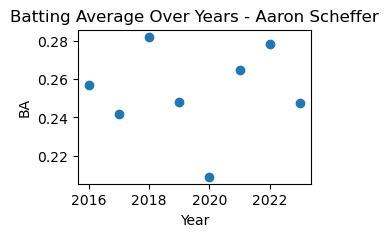

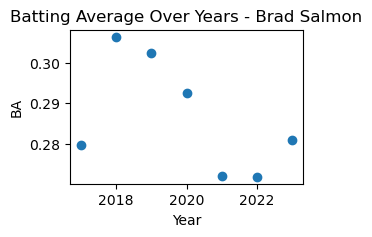

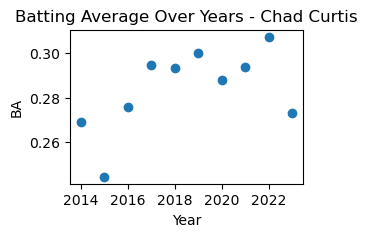

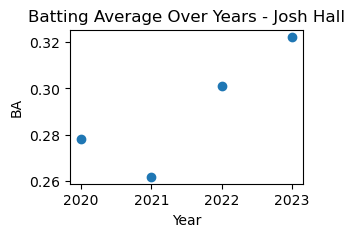

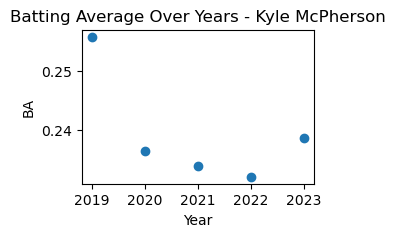

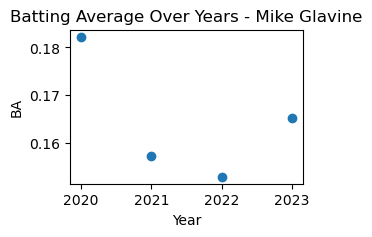

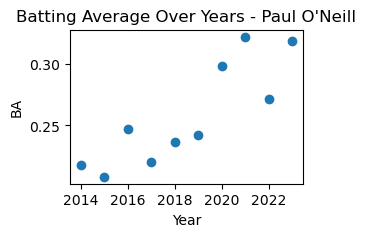

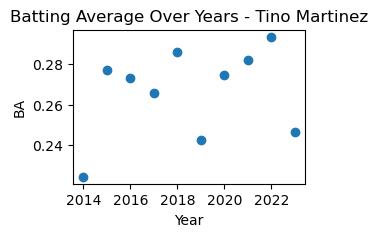

In [52]:
# Create a scatter plot with facet wrapping
for key, grp in astro_batting_season_summary.groupby('Name'):
    plt.figure(figsize=(3, 2))  # Create a new figure for each player
    plt.scatter(grp['Year'], grp['BA'])
    plt.xlabel('Year')
    plt.ylabel('BA')
    plt.title(f'Batting Average Over Years - {key}')
    plt.show()

In [16]:
#get area that astros players play in
astro_batting_season_summary.loc[astro_batting_season_summary['pos'].isin(['LF', 'CF', 'RF']), 'area'] = 'outfield'
astro_batting_season_summary.loc[astro_batting_season_summary['pos'].isin(['SS', '1B', '2B', '3B']), 'area'] = 'infield'
astro_batting_season_summary.loc[astro_batting_season_summary['pos'] == 'P', 'area'] = 'P'
astro_batting_season_summary.loc[astro_batting_season_summary['pos'] == 'C', 'area'] = 'C'
astro_batting_season_summary.head()

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year,area
811,Aaron Scheffer,33,Astros,C,774,703,170,35,31,6,71,196,3.454780,0.241821,0.311370,0.405405,0.716775,2017,C
1081,Aaron Scheffer,34,Astros,C,764,709,200,43,39,12,55,188,3.362565,0.282087,0.333770,0.503526,0.837296,2018,C
1351,Aaron Scheffer,35,Astros,C,755,685,170,31,18,8,70,207,3.517881,0.248175,0.317881,0.381022,0.698903,2019,C
2161,Aaron Scheffer,38,Astros,C,736,676,188,40,37,12,60,198,3.463315,0.278107,0.336957,0.500000,0.836957,2022,C
2431,Aaron Scheffer,39,Astros,C,745,678,168,37,24,9,67,211,3.613423,0.247788,0.315436,0.412979,0.728416,2023,C


In [18]:
# Filter the DataFrame for the player with the name "Mike Glavine"
mike_glavine_df = astro_batting_season_summary[astro_batting_season_summary['Name'] == 'Mike Glavine']
# Print the content of the "area" column
print("Area for Mike Glavine:")
print(mike_glavine_df['area'])

# for "Kyle McPherson"
kyle_mcpherson_df = astro_batting_season_summary[astro_batting_season_summary['Name'] == 'Kyle McPherson']
# Print the content of the "area" column
print("Area for Kyle McPherson:")
print(kyle_mcpherson_df['area'])

# for "Aaron Scheffer"
aaron_scheffer_df = astro_batting_season_summary[astro_batting_season_summary['Name'] == 'Aaron Scheffer']

# Print the content of the "area" column
print("Area for Aaron Scheffer:")
print(aaron_scheffer_df['area'])

Area for Mike Glavine:
1804    P
2345    P
2073    P
2617    P
Name: area, dtype: object
Area for Kyle McPherson:
2592    infield
1519    infield
2047    infield
2315    infield
1778    infield
Name: area, dtype: object
Area for Aaron Scheffer:
811     C
1081    C
1351    C
2161    C
2431    C
541     C
1621    C
1891    C
Name: area, dtype: object


In [30]:
#looking at potential pitchers
potential_pitchers = common_players_season_summary_df[common_players_season_summary_df['area'] == 'P']
potential_pitchers.head()
#potential_pitchers.to_csv("potential_pitchers.csv", index=False)

,Name,age,team,pos,PA,AB,H,2B,3B,HR,BB,SO,P/PA,BA,OBP,SLG,OPS,Year,area
92,Dusty Wathan,27,Mets,P,698,663,153,34,26,12,35,170,3.336676,0.230769,0.269341,0.414781,0.684122,2014,P
102,Eric Hull,25,Rangers,P,676,633,136,27,21,14,43,124,3.221893,0.214850,0.264793,0.390205,0.654998,2014,P
109,Gabe Gonzalez,23,Giants,P,659,633,127,30,13,10,26,110,3.054628,0.200632,0.232170,0.336493,0.568663,2014,P
153,Josh Prince,27,Yankees,P,649,621,98,30,16,1,28,174,3.403698,0.157810,0.194145,0.262480,0.456625,2014,P
160,Justin Kaye,28,Red Sox,P,667,587,198,36,25,24,80,104,3.542729,0.337308,0.416792,0.606474,1.023265,2014,P


In [35]:
# Load the datasets
pitching_logs = pd.read_csv("pitching_logs.csv")

# Load the pitching_logs dataset
pitching_logs = pd.read_csv("pitching_logs.csv")

# Group by "Name" and "Year", calculate the average FIP
average_fip = pitching_logs.groupby(['Name', 'Year'])['FIP'].mean().reset_index()

# Rename the FIP column to Average_FIP
average_fip = average_fip.rename(columns={'FIP': 'Average_FIP'})

# Print the new dataset
average_fip


,Name,Year,Average_FIP
0,Alex Castellanos,2014,2.486748
1,Alex Castellanos,2015,2.486748
2,Alex Castellanos,2016,2.486748
3,Alex Castellanos,2017,2.486748
4,Alex Castellanos,2018,2.486748
...,...,...,...
484,Zach Lee,2019,2.914171
485,Zach Lee,2020,3.058351
486,Zach Lee,2021,3.150057
487,Zach Lee,2022,3.233939


In [39]:
potential_pitcher_average_fip= pd.merge(average_fip, potential_pitchers[['Name']], on='Name', how='inner')
potential_pitcher_average_fip = potential_pitcher_average_fip.drop_duplicates(subset=['Name', 'Year'])
potential_pitcher_average_fip

,Name,Year,Average_FIP
323,Dusty Wathan,2020,2.004568
333,Dusty Wathan,2021,2.006745
313,Dusty Wathan,2019,2.016737
303,Dusty Wathan,2018,2.048045
343,Dusty Wathan,2022,2.052848
...,...,...,...
228,Darren Hall,2019,3.960180
742,Josh Prince,2021,3.965603
222,Darren Hall,2018,3.965988
752,Josh Prince,2022,4.004176


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


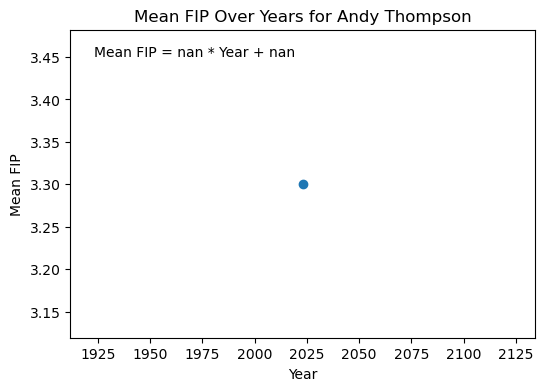

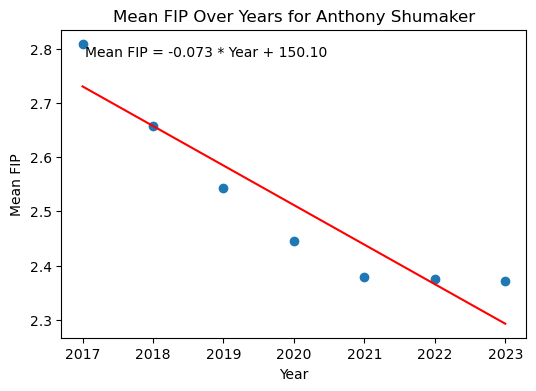

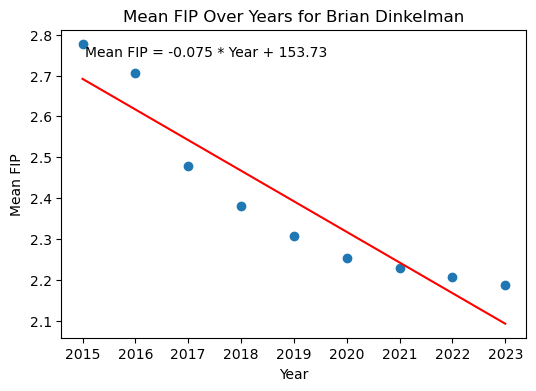

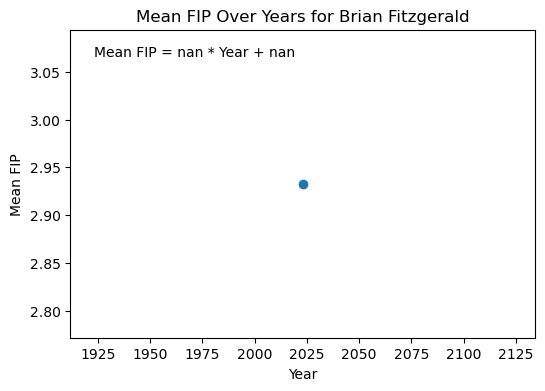

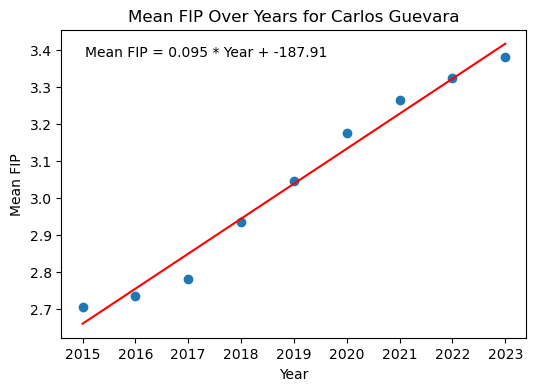

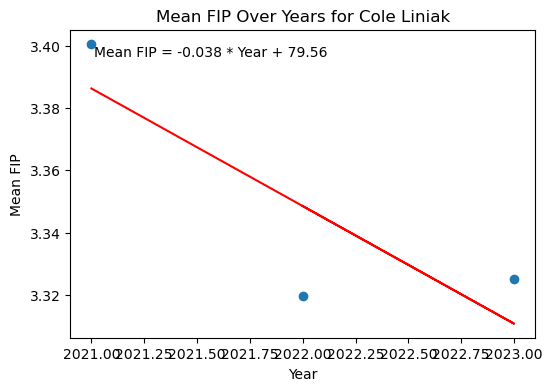

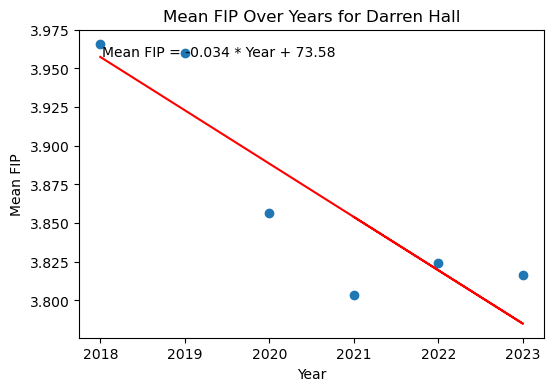

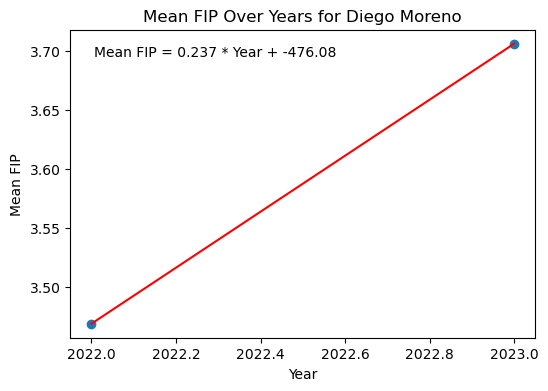

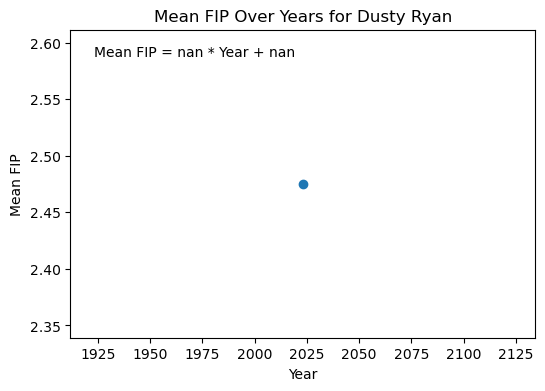

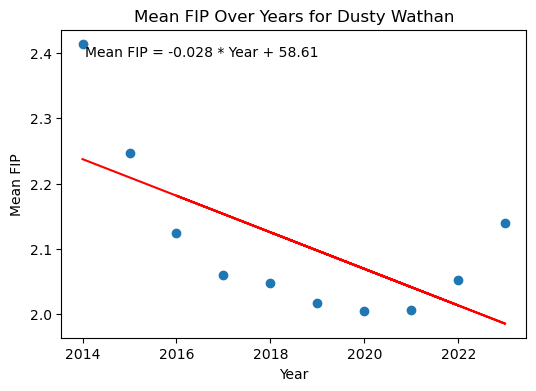

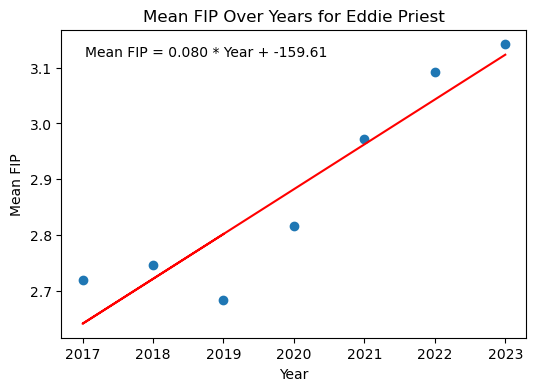

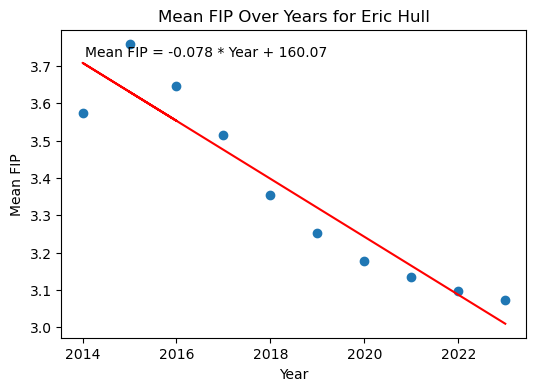

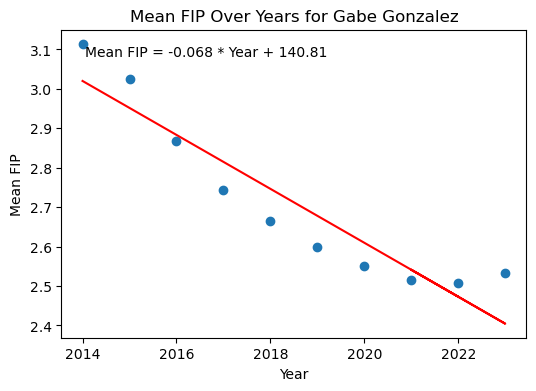

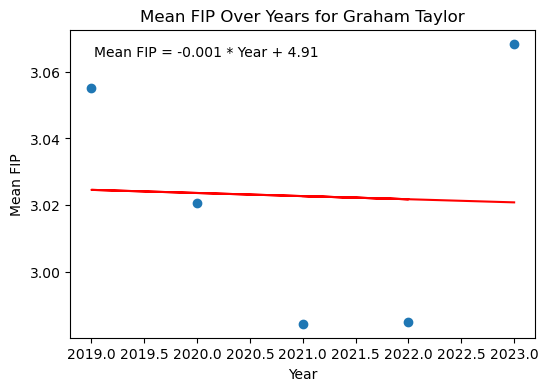

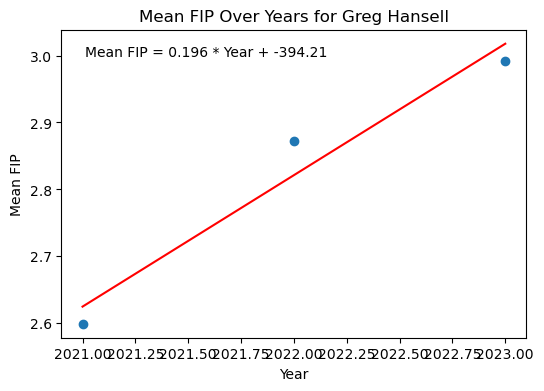

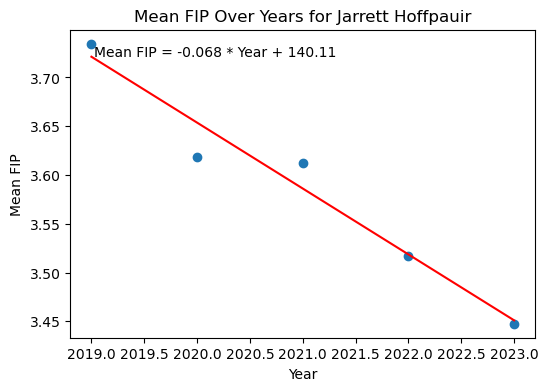

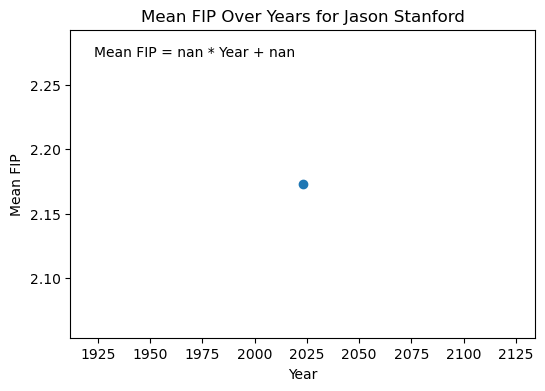

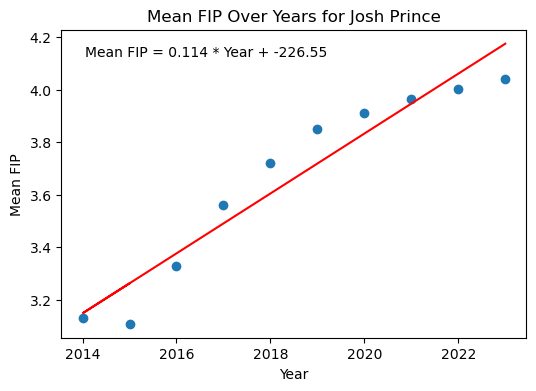

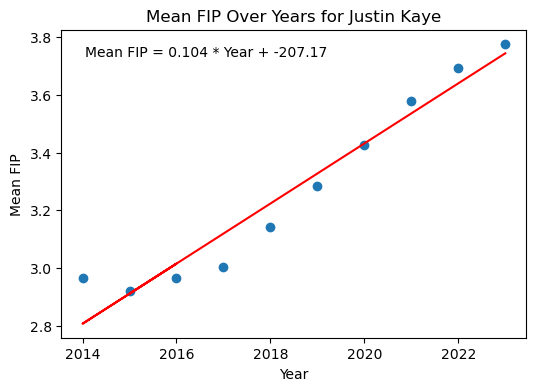

In [65]:
for key, grp in potential_pitcher_average_fip.groupby('Name'):
    plt.figure(figsize=(6, 4))  
    plt.scatter(grp['Year'], grp['Average_FIP'], label='Data')
    slope, intercept, r_value, p_value, std_err = linregress(grp['Year'], grp['Average_FIP'])
    plt.plot(grp['Year'], slope * grp['Year'] + intercept, color='red', label='Linear Regression')
    
    slope_formatted = '{:.3f}'.format(slope)
    equation = f'Mean FIP = {slope_formatted} * Year + {intercept:.2f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    
    plt.xlabel('Year')
    plt.ylabel('Mean FIP')
    plt.title(f'Mean FIP Over Years for {key}')
    
    plt.show()

In [25]:
#looking at potential catchers
potential_catcher = common_players_season_summary_df[common_players_season_summary_df['area'] == 'C']

# Write the DataFrame to a CSV file
#potential_catcher.to_csv("potential_catcher.csv", index=False)

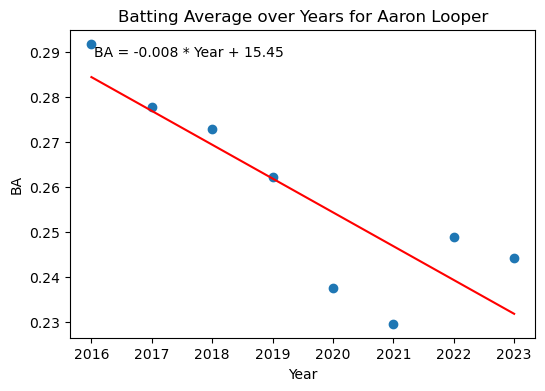

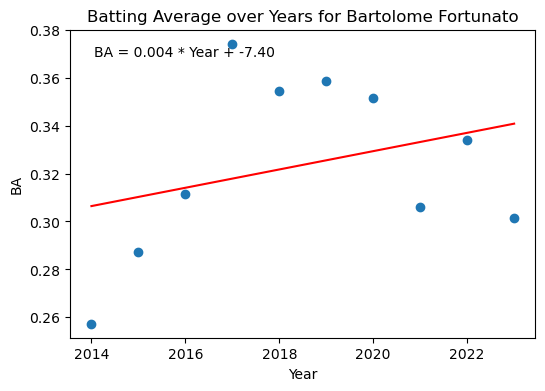

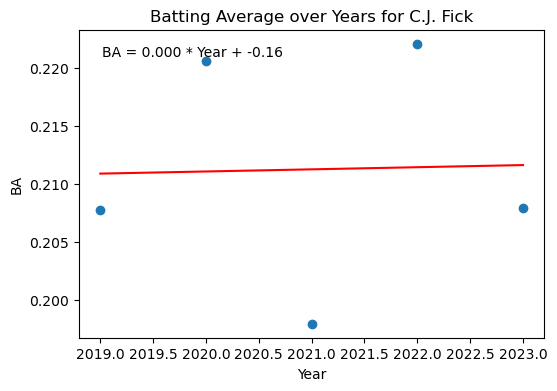

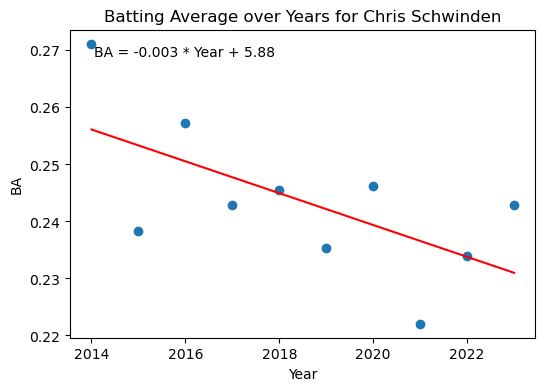

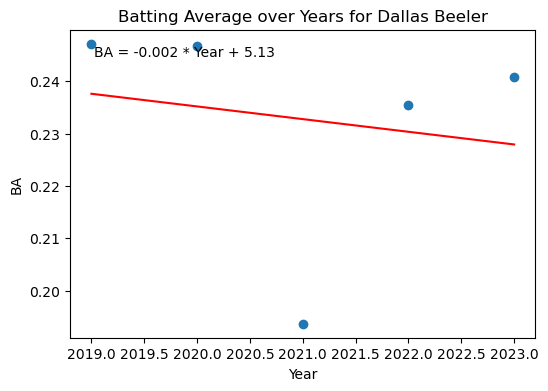

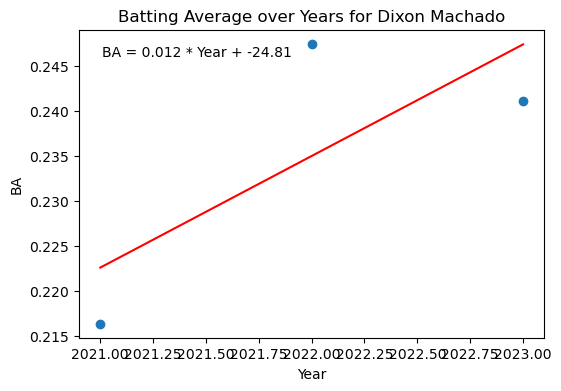

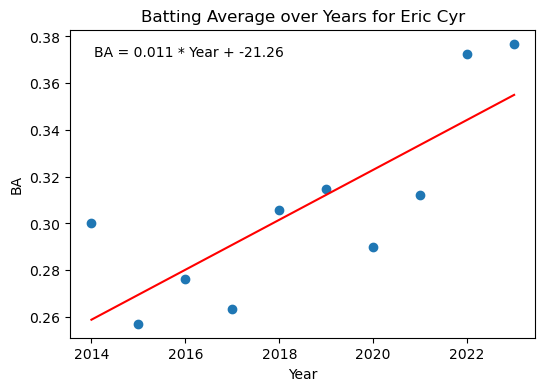

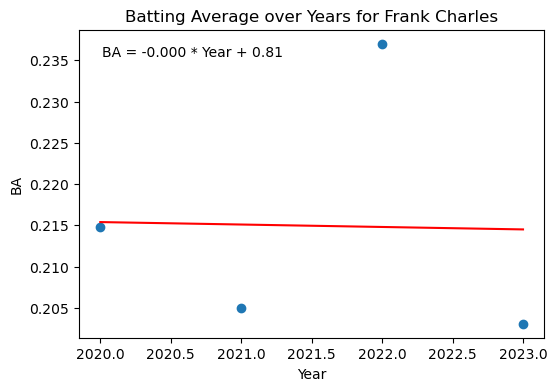

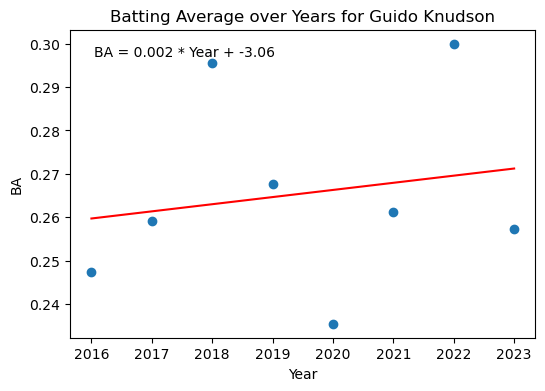

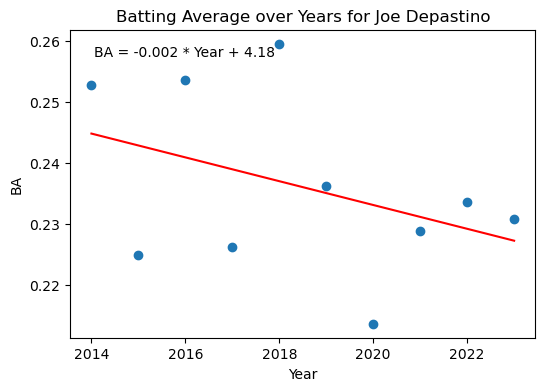

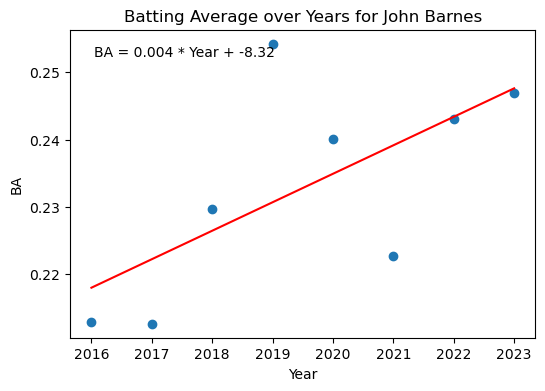

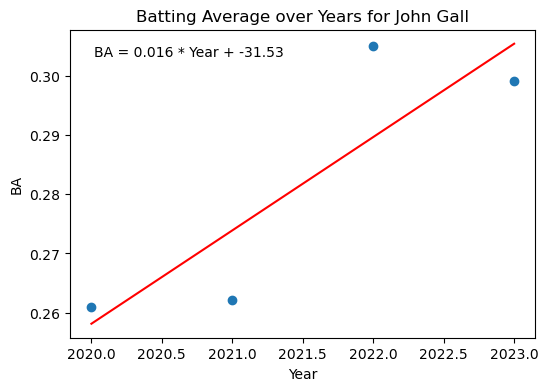

In [63]:
# Iterate over each group of potential catchers by name
for key, grp in potential_catcher.groupby('Name'):
    plt.figure(figsize=(6, 4))  
    plt.scatter(grp['Year'], grp['BA'], label='Data')

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(grp['Year'], grp['BA'])
    plt.plot(grp['Year'], slope * grp['Year'] + intercept, color='red', label='Linear Regression')
    slope_formatted = '{:.3f}'.format(slope)
    equation = f'BA = {slope_formatted} * Year + {intercept:.2f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    
    plt.xlabel('Year')
    plt.ylabel('BA')
    plt.title(f'Batting Average over Years for {key}')
    plt.show()


In [24]:
#looking at potential infields
potential_infield = common_players_season_summary_df[common_players_season_summary_df['area'] == 'infield']

# Write the DataFrame to a CSV file
#potential_infield.to_csv("potential_infield.csv", index=False)

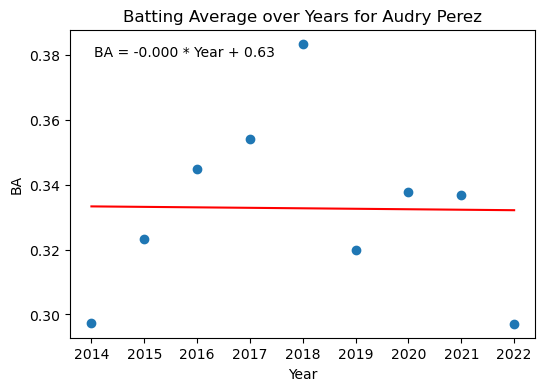

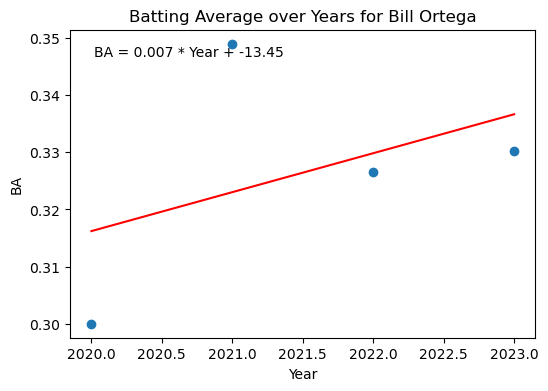

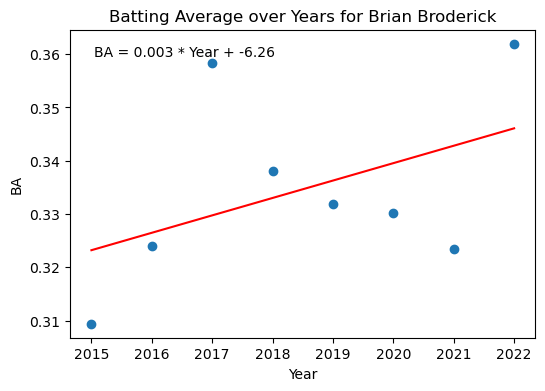

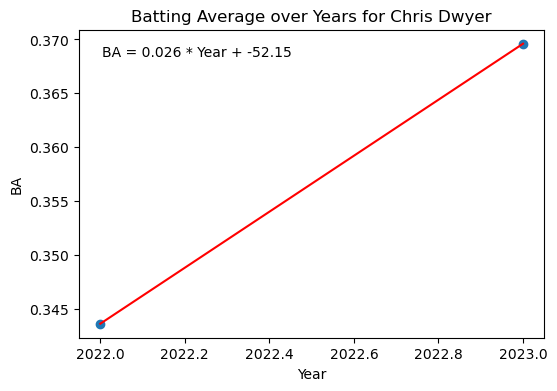

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


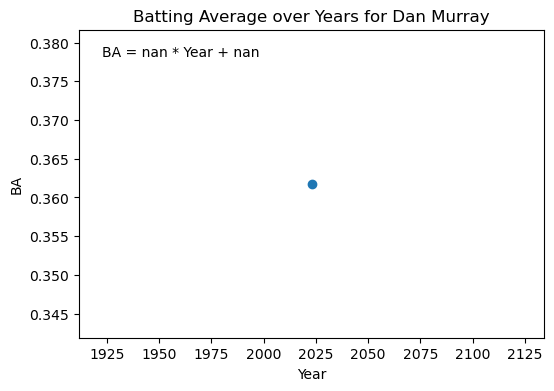

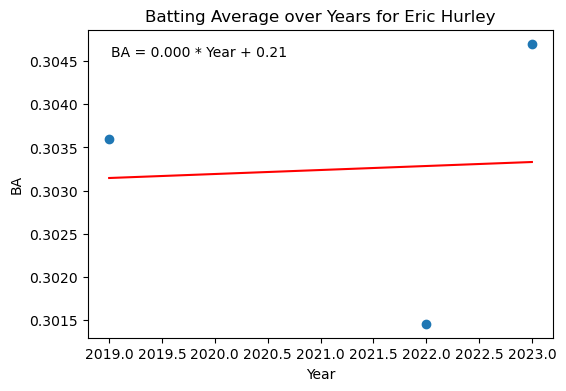

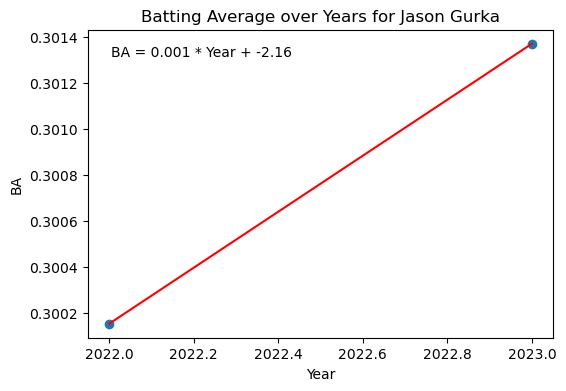

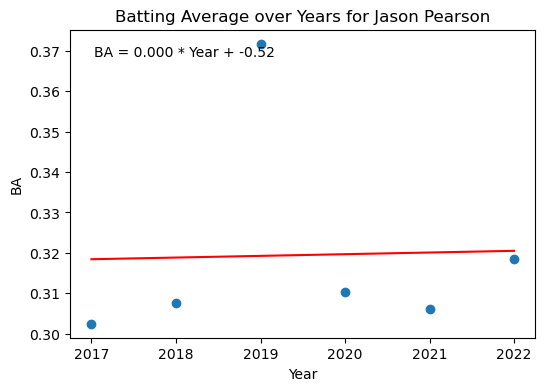

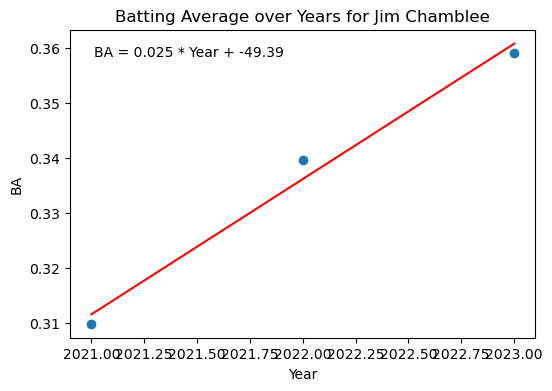

In [93]:
potential_infield = potential_infield[potential_infield['BA'] > potential_infield['BA'].mean()]

# List of selected names
selected_names = ["Jim Chamblee", "Bill Ortega", "Eric Hurley", "Jason Gurka", "Audry Perez", "Jason Pearson", "Brian Broderick", "Chris Dwyer", "Dan Murray"]

# Filter potential_infield DataFrame to include only selected names
potential_infield_filtered = potential_infield[potential_infield['Name'].isin(selected_names)]

#working
# Iterate over each group of potential catchers by name
for key, grp in potential_infield_filtered.groupby('Name'):
    plt.figure(figsize=(6, 4))  
    plt.scatter(grp['Year'], grp['BA'], label='Data')

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(grp['Year'], grp['BA'])
    plt.plot(grp['Year'], slope * grp['Year'] + intercept, color='red', label='Linear Regression')
    slope_formatted = '{:.3f}'.format(slope)
    equation = f'BA = {slope_formatted} * Year + {intercept:.2f}'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    
    plt.xlabel('Year')
    plt.ylabel('BA')
    plt.title(f'Batting Average over Years for {key}')
    plt.show()


In [91]:
#ml linear regression model to predict future hits

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select relevant features for prediction
features = ['age', 'PA', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'P/PA', 'BA', 'OBP', 'SLG', 'OPS', 'Year']

# Initialize a new DataFrame to store predictions
future_hits_df = pd.DataFrame(columns=['Name', 'Predicted_Hits'])

# Iterate over each unique name in the dataset
for name in common_players_season_summary_df['Name'].unique():
    # Filter data for the current player
    player_data = common_players_season_summary_df[common_players_season_summary_df['Name'] == name]
    
    # Check if there is only one year of data for the player
    if len(player_data) == 1:
        predicted_hits = player_data['H'].values[0]  # Set predicted hits for next year to be the same as current year
    else:
        # Separate the last year's data as test data (to predict next year's hits)
        X_train = player_data[features][:-1]
        y_train = player_data['H'][:-1]
        X_test = player_data[features][-1:]

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict hits for the next year
        predicted_hits = model.predict(X_test)[0]

    # Append the name and predicted hits to future_hits_df
    future_hits_df = pd.concat([future_hits_df, pd.DataFrame({'Name': [name], 'Predicted_Hits': [predicted_hits]})])

future_hits_df.to_csv('future_hits_predictions.csv', index=False)


/var/folders/55/k0kvswzj3d98v0vz2_zc060w0000gn/T/ipykernel_12275/863530530.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_hits_df = pd.concat([future_hits_df, pd.DataFrame({'Name': [name], 'Predicted_Hits': [predicted_hits]})])
